# Лабораторная работа 5 : Кластерный анализ. Визуализация многомерных данных. Методы понижения размерности.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

## Часть 1

In [137]:
V = 83
X1 = [40+V, 100-V, 30+V, 25+V, V, 100+V, 230-V, 110+V, 120+V, 180-V]
X2 = [10+V, 110-V, 20+V, 15+V, 105-V, 120+V,220-V, 90+V, 200-V, 160-V]
X = np.stack([X1, X2], axis = -1)

In [138]:
def plot1(model, name):
    for i in range(len(X)):
        if(model.labels_[i] == 0):
            plt.scatter(X1[i], X2[i], alpha = 0.8,s = 10, color = 'red')
        else:
            plt.scatter(X1[i], X2[i], alpha = 0.8,s = 10, color = 'green')
    plt.title(name, size = 20)
    plt.legend()

# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot2(model, name, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    plt.title(name, size = 20)

def plot3(model, name):
    plt.figure(figsize=(10, 10))
    plt.scatter(model[:,0], model[:,1], alpha = 0.8,s = 10)
    plt.title(name, size = 20)
    plt.legend()

In [139]:
clustering_complete = AgglomerativeClustering(affinity='euclidean', linkage = 'complete').fit(X)
clustering_single = AgglomerativeClustering(affinity='euclidean', linkage = 'single').fit(X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


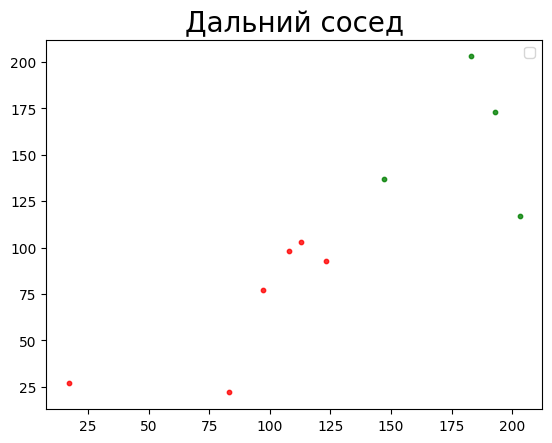

In [140]:
plot1(clustering_complete, "Дальний сосед")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


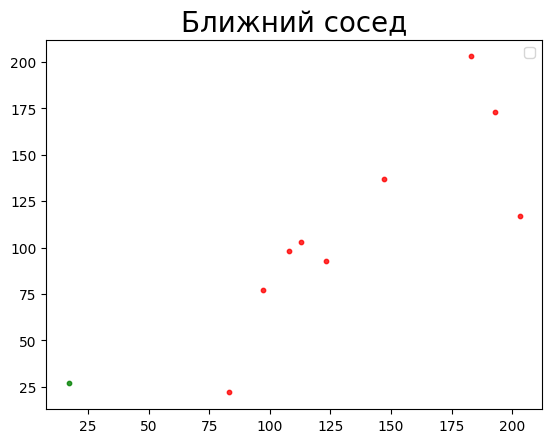

In [141]:
plot1(clustering_single, "Ближний сосед")

In [142]:
clustering_complete = AgglomerativeClustering(affinity='euclidean', linkage = 'complete', distance_threshold=0., n_clusters= None).fit(X)
clustering_single = AgglomerativeClustering(affinity='euclidean', linkage = 'single', distance_threshold=0., n_clusters= None).fit(X)

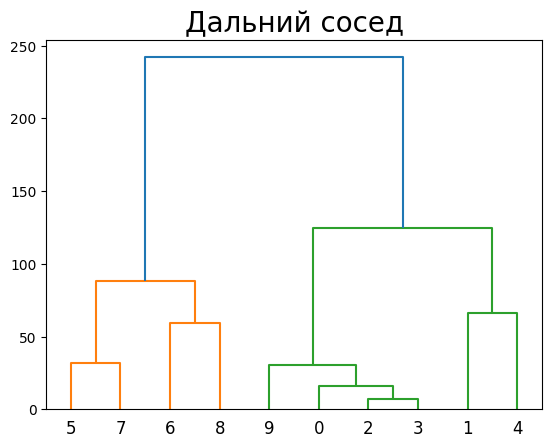

In [143]:
plot2(clustering_complete, "Дальний сосед", truncate_mode="level", p=3)

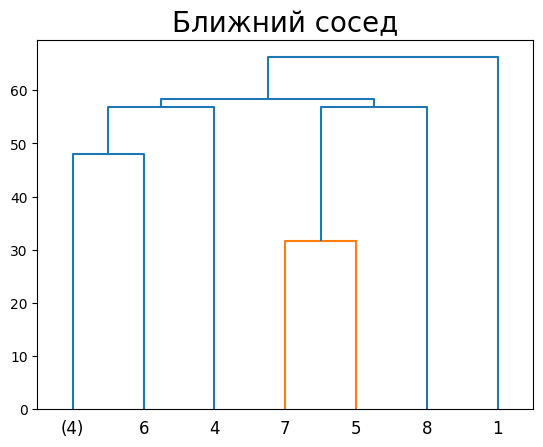

In [144]:
plot2(clustering_single, "Ближний сосед", truncate_mode="level", p=3)

## Часть 2

In [145]:
df = pd.read_csv("avocado.csv", parse_dates=True)
df = df.sample(frac=1)
df = df.reset_index()
df = df.rename(columns={"4046": "Small Hass",
               "4225": "Large Hass", "4770": "XLarge Hass"})
df = df.drop(columns=["Unnamed: 0", "index"])

stringValues = ['Date', 'type', 'region']
df[stringValues] = df[stringValues].apply(lambda x: pd.factorize(x)[0])

df

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,0.98,853642.90,564685.19,79267.58,1096.90,208593.23,91618.58,116804.65,170.00,0,2018,0
1,1,1.53,52129.42,14799.32,10278.09,401.59,26650.42,22526.26,4124.16,0.00,1,2016,1
2,2,0.97,455798.50,123228.06,230068.42,23080.58,79421.44,76260.19,2607.08,554.17,0,2017,2
3,3,1.41,98075.02,36639.68,25755.75,133.09,35546.50,35306.50,240.00,0.00,0,2016,3
4,4,1.76,43201.25,5866.30,10066.67,1872.81,25395.47,18106.52,7288.95,0.00,1,2016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,51,1.20,349206.00,212316.00,27720.00,907.00,108263.00,63245.00,45015.00,3.00,0,2017,40
18245,18,2.11,70419.78,10621.24,27740.88,0.00,32057.66,32041.66,16.00,0.00,1,2017,34
18246,164,1.82,14927.44,625.56,7940.04,269.05,6092.79,3703.26,2389.53,0.00,1,2016,44
18247,130,2.22,9818.51,31.39,4550.54,194.47,5042.11,4819.49,222.62,0.00,1,2017,26


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   Small Hass    18249 non-null  float64
 4   Large Hass    18249 non-null  float64
 5   XLarge Hass   18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  int64  
 11  year          18249 non-null  int64  
 12  region        18249 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 1.8 MB


In [147]:
X = df.dropna().reset_index().drop('AveragePrice', axis=1)

In [148]:
X = StandardScaler().fit_transform(X)

X_pca = PCA(n_components=2).fit_transform(X)

X_tsme = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)

X_umap = umap.UMAP(n_neighbors=5, random_state=42).fit(X).embedding_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


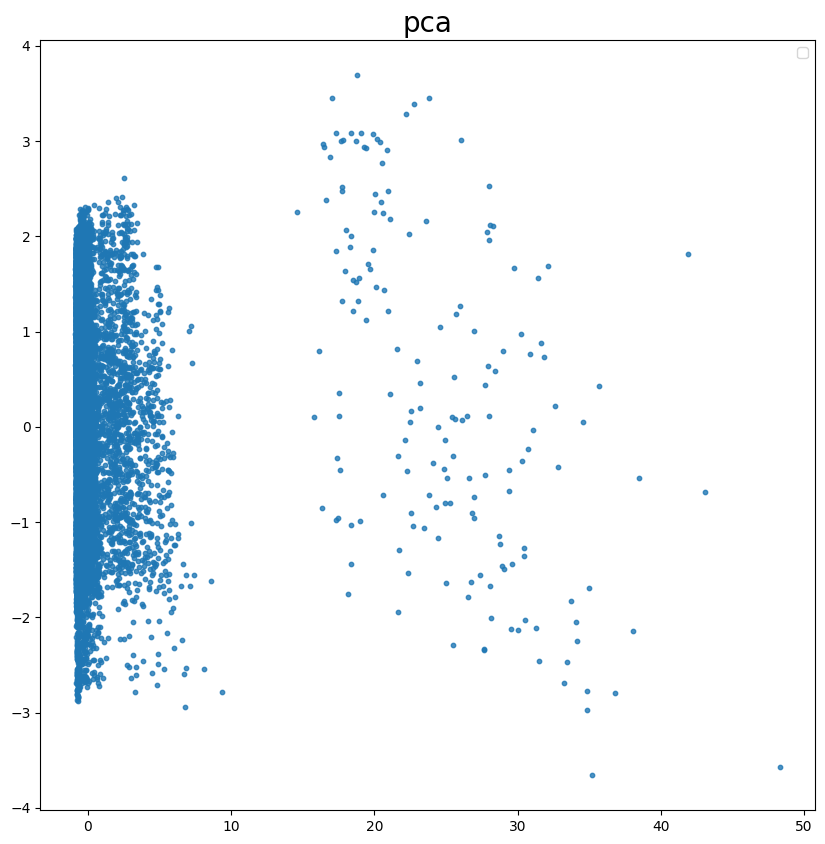

In [149]:
plot3(X_pca, "pca")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


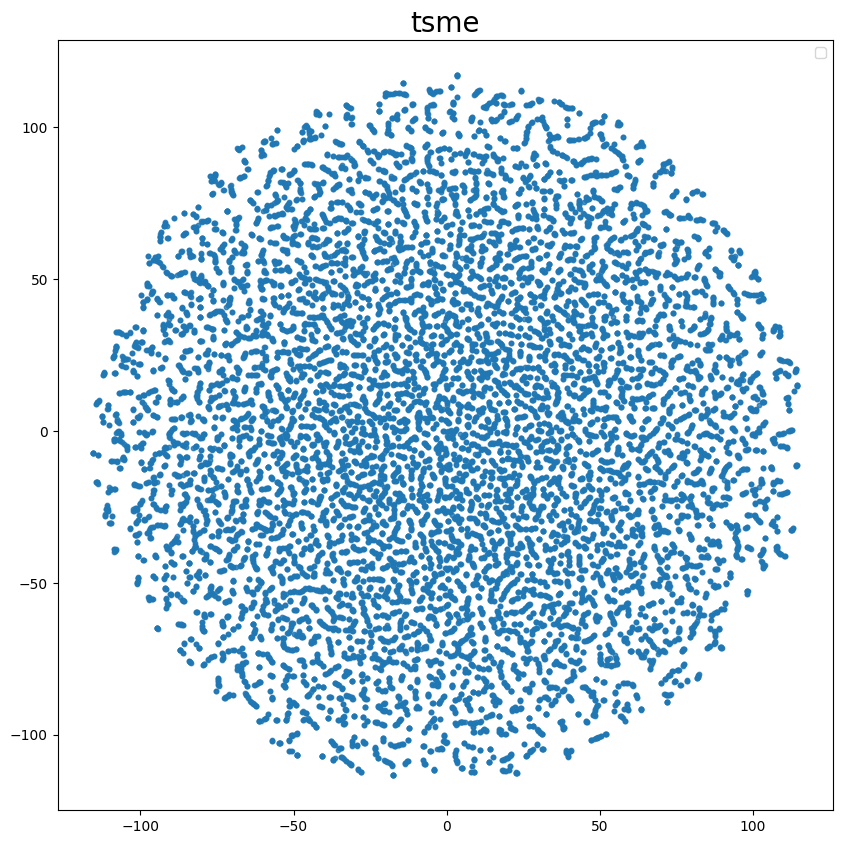

In [150]:
plot3(X_tsme, "tsme")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


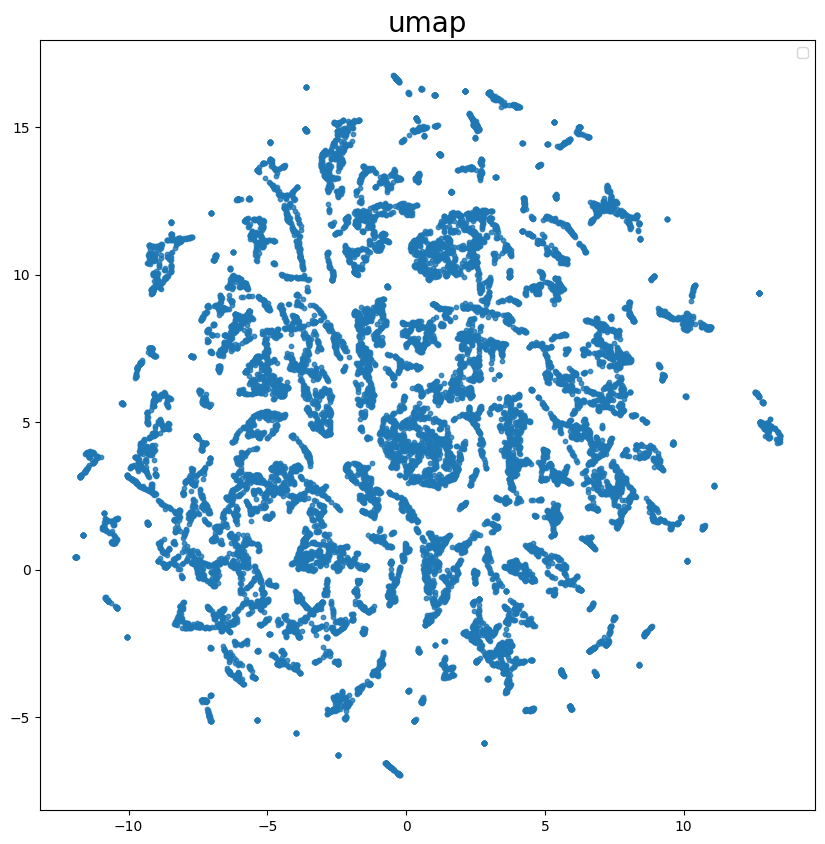

In [151]:
plot3(X_umap, "umap")